## 일표본 다항(비율) 차이분석 ==> chi-square.test

In [1]:
# -*- coding: utf-8 -*-
#컨벤션
%matplotlib inline
from pandas import DataFrame, Series
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import statsmodels

In [2]:
#skipinitialspace 컬럼의 빈칸 없애고 전체 자료 읽어 들이기
my_df = pd.read_csv('coupon.csv', skipinitialspace=True)

In [3]:
#변수 확인
print(my_df.head())
print(my_df.tail())
print(my_df.info())
print(my_df.describe())

   no  type  category   amount  week
0   1     1       4.0  99300.0   1.0
1   2     1       2.0  98300.0   1.0
2   4     2       NaN      NaN   NaN
3   6     1       NaN      NaN   NaN
4   9     2       NaN      NaN   NaN
      no  type  category    amount  week
196  295     2       NaN       NaN   NaN
197  296     2       NaN       NaN   NaN
198  298     2       NaN       NaN   NaN
199  299     2       4.0  152400.0   1.0
200  300     2       1.0   37600.0   0.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 5 columns):
no          201 non-null int64
type        201 non-null int64
category    117 non-null float64
amount      117 non-null float64
week        117 non-null float64
dtypes: float64(3), int64(2)
memory usage: 7.9 KB
None
               no        type    category         amount        week
count  201.000000  201.000000  117.000000     117.000000  117.000000
mean   149.323383    1.437811    2.495726   86906.837607    0.555556
std  

In [4]:
#서브셋 데이터 생성
my_df.category.value_counts(normalize=False, sort=False, dropna=False)

 4.0    29
 2.0    30
NaN     84
 3.0    29
 1.0    29
Name: category, dtype: int64

In [5]:
sb_ct = my_df[my_df.category.notnull()]
sb_ct.head()

,no,type,category,amount,week
0,1,1,4.0,99300.0,1.0
1,2,1,2.0,98300.0,1.0
5,10,2,3.0,40900.0,0.0
6,11,1,3.0,76400.0,1.0
7,13,1,2.0,83800.0,1.0


In [7]:
#사용분야 변수 빈도분석
print(sb_ct.category.value_counts(normalize=False, sort=False))
print(sb_ct.category.value_counts(normalize=True, sort=False))

4.0    29
2.0    30
3.0    29
1.0    29
Name: category, dtype: int64
4.0    0.247863
2.0    0.256410
3.0    0.247863
1.0    0.247863
Name: category, dtype: float64


In [8]:
#레이블 선언
category_lables = {1: 'travel', 2: 'beauty', 3: 'food', 4: 'apparals'}

In [9]:
#레이블이 들어간 빈도분석
category_fq = sb_ct.category.apply(lambda x: category_lables[x]).value_counts(normalize=False, sort=False)
category_rt = sb_ct.category.apply(lambda x: category_lables[x]).value_counts(normalize=True, sort=False)
print(category_fq)
print(category_rt)

beauty      30
apparals    29
food        29
travel      29
Name: category, dtype: int64
beauty      0.256410
apparals    0.247863
food        0.247863
travel      0.247863
Name: category, dtype: float64


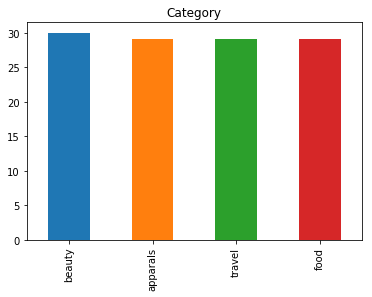

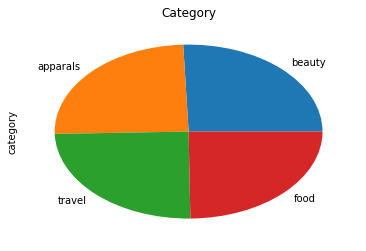

In [15]:
#막대그래프(레이블 있음)
plt.figure(0)
category_fq.plot(kind='bar', title='Category')
plt.figure(1)
category_fq.plot(kind='pie', title='Category')

In [10]:
#다항검정
stats.chisquare(category_fq)
(x, y) = stats.chisquare(category_fq)
print("다항: Chi-Sqare = %4.3f, p-value = %4.3f" % (x, y))

다항: Chi-Sqare = 0.026, p-value = 0.999


In [11]:
#적합도
exp_rt = np.array([0.19, 0.23, 0.37, 0.31]) # 경험적 기준(업계 평균+알파...)
data = {'exp_val':exp_rt,'osb_val':category_rt}
data2 = pd.DataFrame(data)
print(data2)
exp_fq = exp_rt * len(sb_ct.category)
stats.chisquare(category_fq, exp_fq)
x = stats.chisquare(category_fq, exp_fq)
print("적합: Chi-Sqare = %4.3f, p-value = %4.3f" % (x.statistic, x.pvalue))

          exp_val   osb_val
beauty       0.19  0.256410
apparals     0.23  0.247863
food         0.37  0.247863
travel       0.31  0.247863
적합: Chi-Sqare = 9.052, p-value = 0.029


## end of documents